## Observations and Insights 

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_data_path = "resources2/mouse_metadata.csv"
study_results_path = "resources2/study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_data_path)
study_results = pd.read_csv(study_results_path)

In [86]:
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [87]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [88]:
# Combine the data into a single dataset
# Display the data table for preview
study_data = pd.merge(study_results, mouse_data, how="left", on="Mouse ID")

# Display the data table for preview
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [89]:
# Checking the number of mice.
unique_mice = len(study_data["Mouse ID"].unique())
mice = study_data["Mouse ID"].count()
pd.DataFrame({"Total mice ID": [mice],"Total Unique mice": [unique_mice]})

,Total mice ID,Total Unique mice
0,1893,249


In [90]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = study_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mouse = study_data.loc[duplicates,['Mouse ID']]
duplicate_mouse

,Mouse ID
137,g989
360,g989
681,g989
869,g989
1111,g989


In [91]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data.loc[study_data['Mouse ID'] == 'g989']
duplicate_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [92]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data = study_data.rename(columns={'Mouse ID': "Mouse_ID"})
mouse_exclude = study_data[study_data.Mouse_ID != 'g989']
mouse_exclude

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [93]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
unique_mice = len(mouse_exclude["Mouse_ID"].unique())
mice = mouse_exclude["Mouse_ID"].count()
pd.DataFrame({"Total mice ID": [mice],"Total Unique mice": [unique_mice]})

,Total mice ID,Total Unique mice
0,1880,248


## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_data = mouse_exclude.groupby('Drug Regimen')

avg = drug_data.mean()['Tumor Volume (mm3)']
med = drug_data.median()['Tumor Volume (mm3)']
var = drug_data.var()['Tumor Volume (mm3)']
std = drug_data.std()['Tumor Volume (mm3)']
sem = drug_data.sem()['Tumor Volume (mm3)']


drug_summary = pd.DataFrame({"Mean Tumor Volume":avg, "Median Tumor Volume":med, "Tumor Volume Variance":var,"Tumor Volume Std. Dev.":std,"Tumor Volume Std. Err.":sem})
drug_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

## Bar and Pie Charts

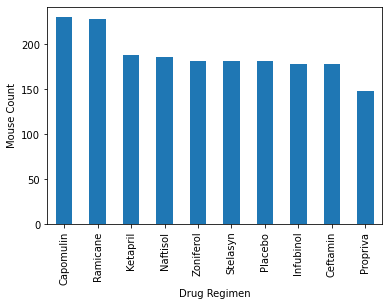

In [96]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Treatment_count = mouse_exclude['Drug Regimen'].value_counts()
Treatment_count.plot(kind="bar")

plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")
plt.xticks(rotation=90)
plt.show()


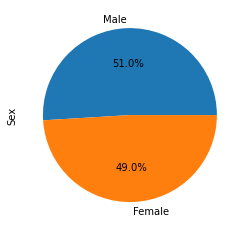

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = mouse_exclude.Sex.value_counts()
gender_count.plot(kind="pie",autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_grouped = mouse_exclude.groupby(["Mouse_ID"])

tumor_max = mouse_grouped.max()['Timepoint']
tumer_max

,Mouse_ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [99]:
tumer_max = tumor_max.reset_index()
tumer_max

,Mouse_ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [100]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data1 = tumer_max.merge(mouse_exclude,on=['Mouse_ID','Timepoint'],how="left")
merged_data1

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [101]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
for drug in treatments:
    
    tumor_volume = merged_data1.loc[merged_data1["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    #print(f"The lower quartile of tumor volume is: {lowerq}")
   # print(f"The upper quartile of tumor volume is: {upperq}")
   # print(f"The interquartile range of tumor volume is: {iqr}")
   # print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers for {drug}.")
    print(f"Values above {upper_bound} could be outliers for {drug}.")

    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    print(" ")

Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 


In [102]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data.plot(kind="boxplot")
plt.show()

AttributeError: 'list' object has no attribute 'plot'

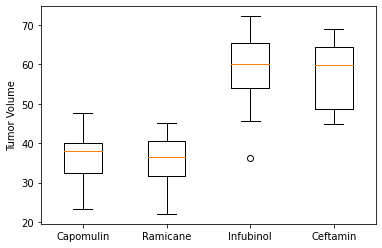

In [103]:
plt.boxplot(tumor_data, labels = treatments)
plt.ylabel('Tumor Volume')
plt.show()

In [104]:
capomulin = mouse_exclude.loc[mouse_exclude['Drug Regimen'] == "Capomulin"]
capomulin

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


## Line and Scatter Plots

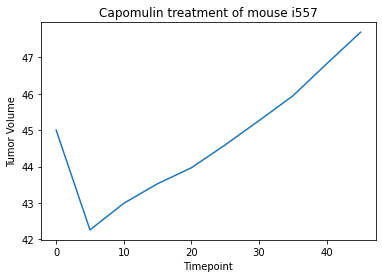

In [105]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse = capomulin.loc[capomulin['Mouse_ID']== 'i557']
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse i557')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

In [106]:
capomulin_grouped = capomulin.groupby(['Mouse_ID'])
avg2 = capomulin_grouped.mean()
avg2

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse_ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


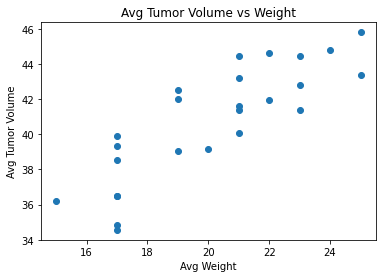

In [107]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(avg2['Weight (g)'],avg2['Tumor Volume (mm3)'])
plt.title('Avg Tumor Volume vs Weight')
plt.xlabel('Avg Weight')
plt.ylabel('Avg Tumor Volume')
plt.show()

## Correlation and Regression

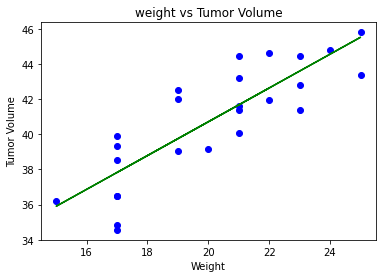

Correlation: 0.8419363424694717


In [110]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(avg2['Weight (g)'],avg2['Tumor Volume (mm3)'],color="blue")
plt.xlabel('Weight')
plt.ylabel("Tumor Volume")
plt.title("weight vs Tumor Volume")
model = st.linregress(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'])
y_values = capomulin['Weight (g)']*model[0]+model[1]
plt.plot(capomulin['Weight (g)'],y_values,color="Green")
plt.show()

correlation = st.pearsonr(avg2['Weight (g)'],avg2['Tumor Volume (mm3)'])
print(f"Correlation: {correlation[0]}")

Text(6, 10, 'y = 0.96x + 21.49')

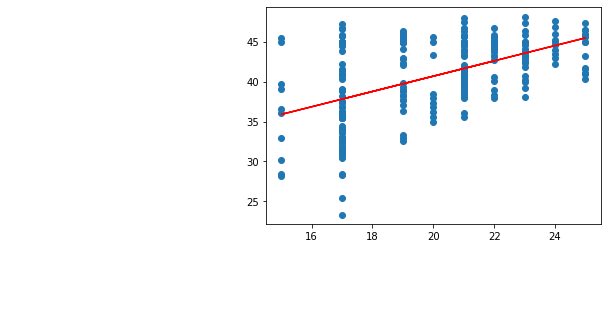

In [126]:
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="green")